# Ford Go Bike **2020** Dataset Wrangling and visualisation 
> Authored by: **Abhishek Pandey** [LinkedIn](https://www.linkedin.com/in/abhishekpandeyit/) | [Twitter](https://twitter.com/PandeyJii_)

## Introduction
> [**Bay Wheels**](https://en.wikipedia.org/wiki/Bay_Wheels#:~:text=Bay%20Wheels%20is%20a%20regional,Area%20Air%20Quality%20Management%20District.) is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In [1]:
"""
Importing all the required python libraries for wrangling process
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings #Using to suppress the warning during final output
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and clean up field dtypes
df = pd.read_csv("F:/Github_repo/BayWheelsRideDataExploration/cleaned_dataset_2020.csv")

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

df['user_type'] = df['user_type'].astype('category')


weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_dayofweek'] = df['start_dayofweek'].astype(weekdaycat)

month = ['January', 'February', 'March', 'April', 'May']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(monthcat)

df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849062 entries, 0 to 849061
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             849062 non-null  float64       
 1   start_time               849062 non-null  datetime64[ns]
 2   end_time                 849062 non-null  datetime64[ns]
 3   start_station_id         849062 non-null  object        
 4   start_station_name       395845 non-null  object        
 5   start_station_latitude   849062 non-null  float64       
 6   start_station_longitude  849062 non-null  float64       
 7   end_station_id           849062 non-null  object        
 8   end_station_name         397691 non-null  object        
 9   end_station_latitude     849062 non-null  float64       
 10  end_station_longitude    849062 non-null  float64       
 11  bike_id                  849062 non-null  object        
 12  user_type       

## User Types and Their Monthly Usage

> In this dataset I found that Subscribers contributed the majority of the bike usage in 2019, about 61%, while about 39% were consumed by cusomters. Where subscribers rides the most during the summer months maxed out in March-October and customers mostly ride in winter and peaked in December.

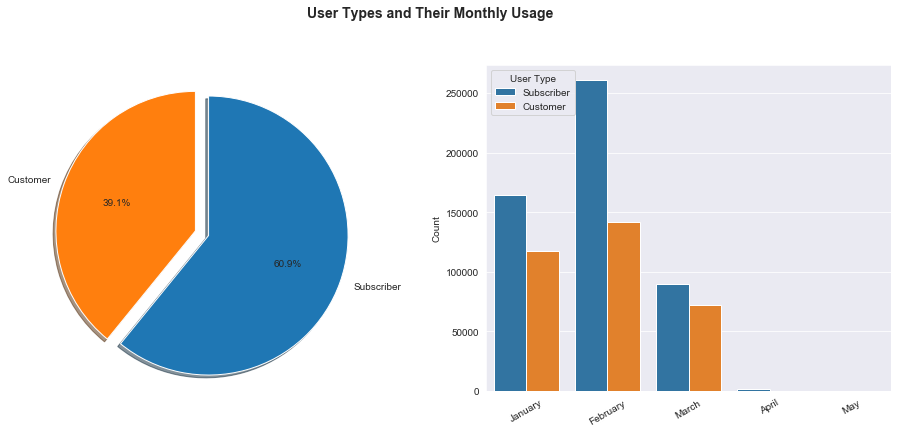

In [3]:
plt.figure(figsize=[16, 6]);
base_color = sns.color_palette('colorblind')[0];
sns.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = df.user_type.value_counts()/df.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sns.countplot(data=df, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

## Hourly Usage during Weekdays for Customers and Subscribers

> Different usage patterns/habits between the two types of riders are clearly seen. Subscribers used the system heavily on work days i.e. Monday -Friday, whereas customers ride a lot on weekends, especially in the afternoon. Mostly trips are concentrated around 8-9am and 4-6pm on work days for subscribers when used for work commute, but casual customers tended to use more in the late afternoon around 5 pm Monday - Friday. 

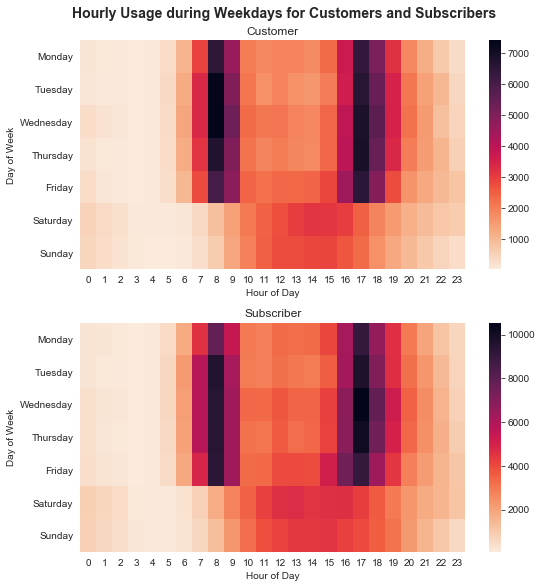

In [4]:
plt.figure(figsize=[8, 8]);

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

## Average Weekday Trip Duration for Customers and Subscribers

> Customers ride much longer trips compared to customers on each day of the week. Both user types had an increase of trip duration on weekends, especially Subscribers. Subscriber usage was more efficient than customers overall and maintained a pretty consistent average duration Monday-Friday.

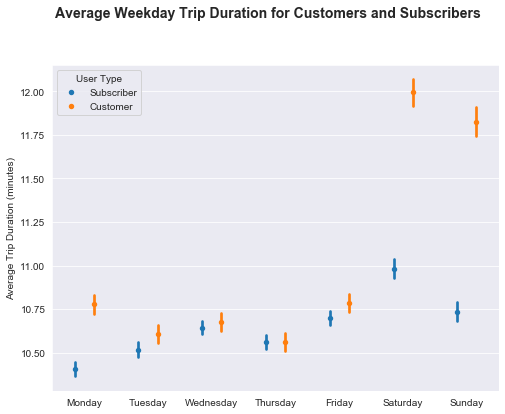

In [5]:
plt.figure(figsize=[8, 6]);
ax = sns.pointplot(data=df, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, markers='.', linestyles="", hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xlabel('');
plt.ylabel('Average Trip Duration (minutes)');
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

## Summary

> - The no. of subscribers are very higher than that of casual customer. 
> - Subscribers used the system heavily on work days concentrated around 8-9am and 4-6pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. 
> - Subscribers tended to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient.